In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

new_path = '/users/ajayaraj/scratch/tests/BLG/tests'
os.chdir(new_path)

In [3]:

from pathlib import Path


Path("./").absolute()

PosixPath('/scratch/snx3000/ajayaraj/tests/BLG/tests')

In [33]:
def split_data_by_bands(filename):
    bands = []
    current_band_data = []

    with open(filename, 'r') as file:
        next(file)

        for line in file:
            if line.strip():  # Check if the line is not empty
                data = line.split()
                current_band_data.append([float(val) for val in data])
            else:
                bands.append(current_band_data)
                current_band_data = []

        if current_band_data:
            bands.append(current_band_data)

    return np.array(bands)

def remove_spurious_points(bands, threshold=10.0):
    filtered_bands = []
    for band in bands:
        filtered_band = []
        for i in range(len(band)):
            if i == 0 or i == len(band) - 1:
                filtered_band.append(band[i])  # Keep the first and last points
            else:
                prev_point = band[i - 1][4]
                curr_point = band[i][4]
                next_point = band[i + 1][4]
                if abs(curr_point - prev_point) <= threshold or abs(curr_point - next_point) <= threshold:
                    filtered_band.append(band[i])
                else:
                    filtered_band.append([band[i][0], band[i][1], band[i][2], band[i][3], np.nan])  # Mark as NaN
        filtered_bands.append(filtered_band)
    return np.array(filtered_bands)


/tmp/ipykernel_24057/3848664165.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # You can adjust legend as per your requirement


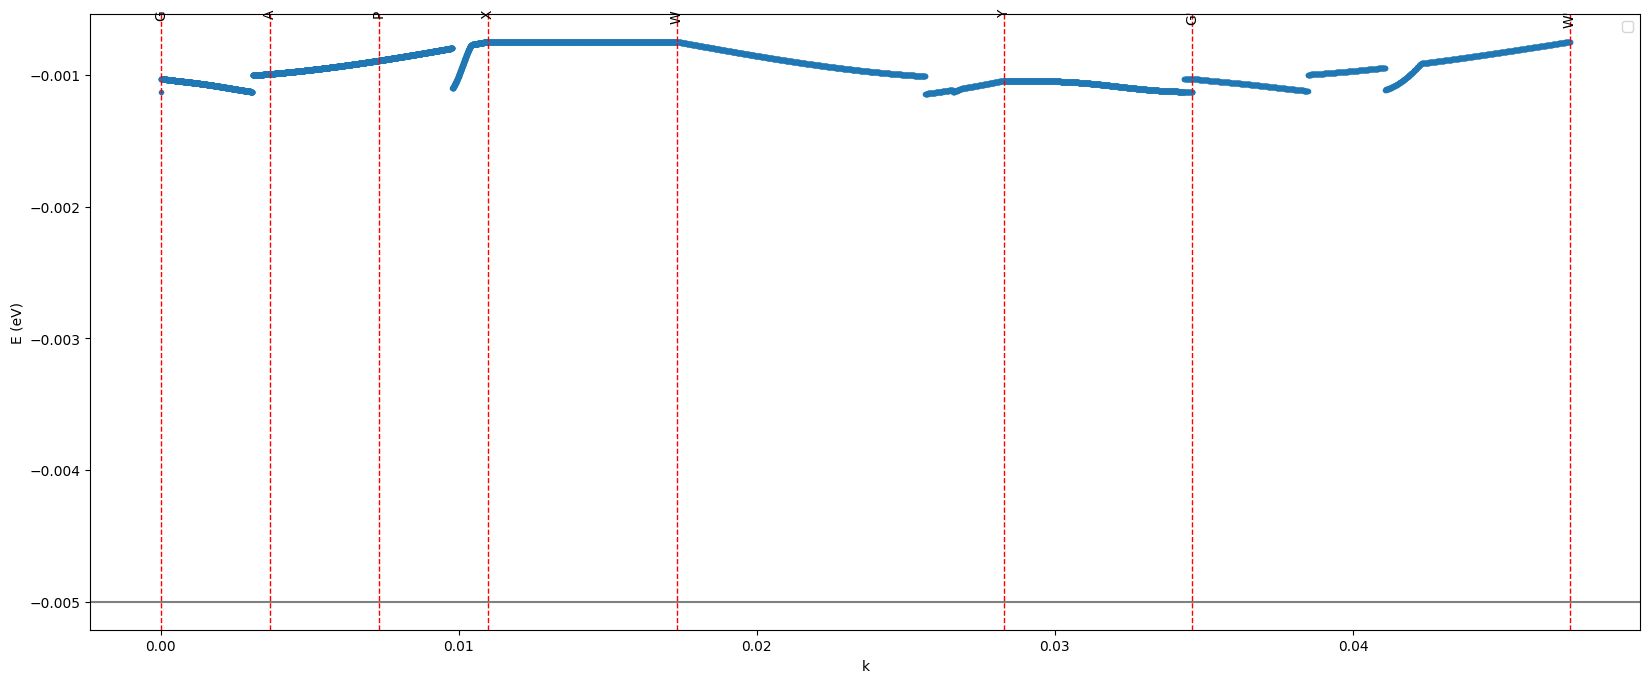

In [37]:
import matplotlib.pyplot as plt

# Define the high symmetry points and their corresponding labels
symmetry_points = {"G": 0.00000, "A": 0.00366, "P": 0.00731, "X": 0.01097,
                   "W": 0.01731, "Y": 0.02828, "G'": 0.03461, "W'": 0.04728}

plt.figure(figsize=(20, 8))

bands = split_data_by_bands(f"len_500x288/nn_1/triangular/amplitude_0.01/width_0.125/bulkek.dat")
bands = remove_spurious_points(bands,threshold=1.0e-4)
klen = bands[19][:, 3]
for band_index in range(0,1): # bands.shape[0]):
    band = bands[band_index][:, 4]
    plt.plot(klen, band, '.')  # Plotting the band data

# plt.ylim(-0.001, 0.001)
plt.ylabel("E (eV)")
plt.xlabel("k")
plt.axhline(-0.005, color='gray', linewidth=1.5)  # Horizontal line at y=0

# Plotting vertical lines at high symmetry points
for label, position in symmetry_points.items():
    plt.axvline(x=position, color='red', linestyle='--', linewidth=1)
    plt.text(position, -0.0005, label, rotation=90, verticalalignment='top', horizontalalignment='center')

plt.legend()  # You can adjust legend as per your requirement
plt.show()


/tmp/ipykernel_24057/3797528032.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # You can adjust legend as per your requirement


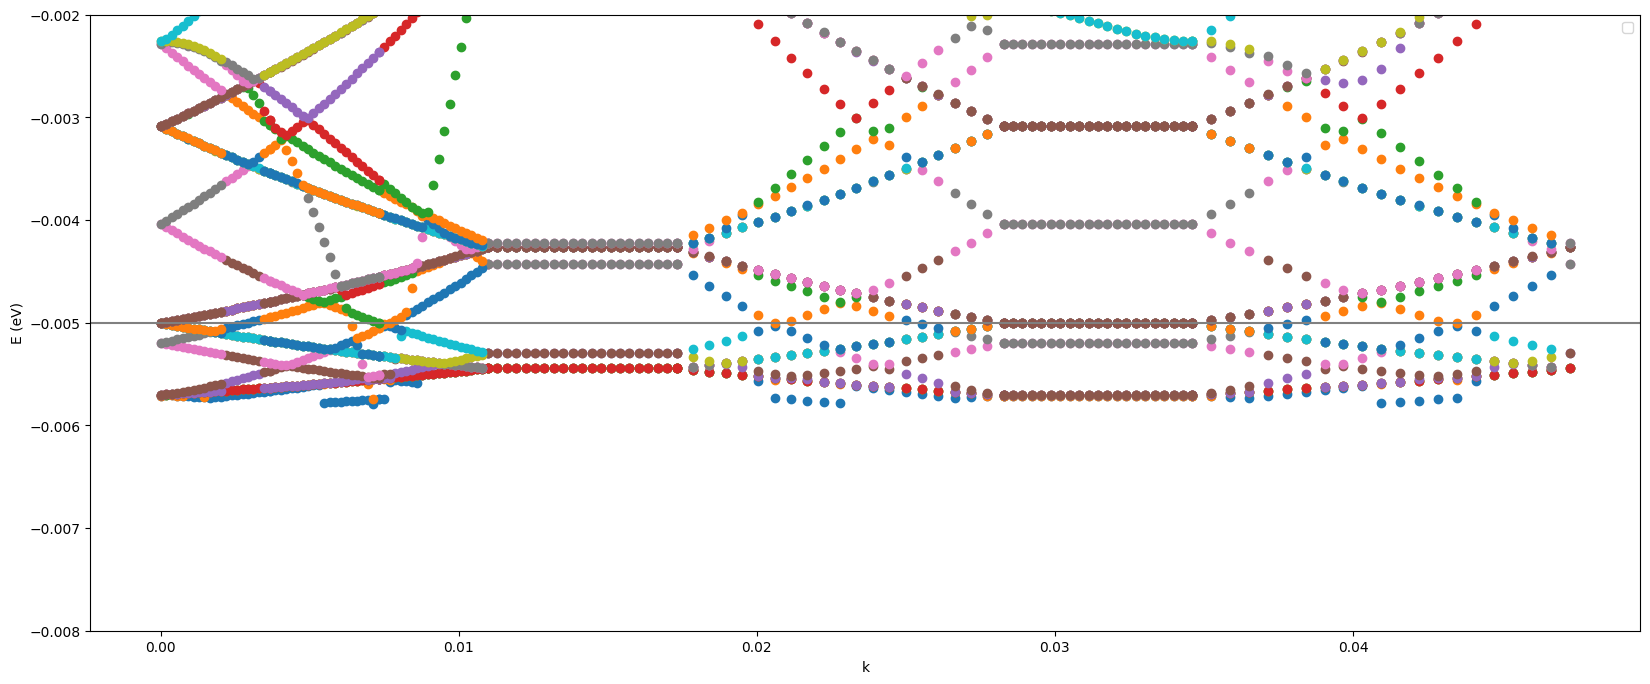

In [51]:
import matplotlib.pyplot as plt

# Define the high symmetry points and their corresponding labels
symmetry_points = {"G": 0.00000, "A": 0.00366, "P": 0.00731, "X": 0.01097,
                   "W": 0.01731, "Y": 0.02828, "G'": 0.03461, "W'": 0.04728}

plt.figure(figsize=(20, 8))
bands = split_data_by_bands(f"len_500x288/nn_1/null/bulkek.dat")
bands = remove_spurious_points(bands,threshold=1.0e-1)
klen = bands[19][:, 3]
for band_index in range(0,40):
    band = bands[band_index][:, 4]
    plt.plot(klen, band,'o')  # Plotting the band data

# plt.ylim(-0.001, 0.001)
plt.ylabel("E (eV)")
plt.xlabel("k")
plt.axhline(-0.005, color='gray', linewidth=1.5)  # Horizontal line at y=0

# Plotting vertical lines at high symmetry points
# for label, position in symmetry_points.items():
#     plt.axvline(x=position, color='red', linestyle='--', linewidth=1)
#     plt.text(position, -0.0005, label, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.ylim(-0.008,-0.002)
plt.legend()  # You can adjust legend as per your requirement
plt.show()
